In [1]:
# librosa 를 이용한 간단한 데이터 시각화
# https://www.dacon.io/competitions/official/235616/codeshare/1277

In [2]:
! pip install seaborn
! pip install tqdm

You should consider upgrading via the 'C:\Users\astro\anaconda3\envs\ae2\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\astro\anaconda3\envs\ae2\python.exe -m pip install --upgrade pip' command.


In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.io import wavfile
from glob import glob
from tqdm import tqdm

%matplotlib inline

sns.set_style('darkgrid')

In [4]:
def data_loader(files):
    out = []
    for file in tqdm(files):
        fs, data = wavfile.read(file)
        out.append(data)    
    out = np.array(out)
    return out

In [8]:
%%time

# 데이터 불러오기
# x_data = glob('./rsc/train/*.wav')
x_data = glob('C:/workspace/autoencoder/01_study/sound/baseline/*.wav')
x_data = data_loader(x_data)

100%|██████████| 11/11 [00:00<00:00, 151.03it/s]

CPU times: total: 31.2 ms
Wall time: 73.8 ms



C:\Users\astro\AppData\Local\Temp\ipykernel_8224\2627130267.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array(out)


In [9]:
%%time

# fs, data = wavfile.read('./rsc/train/train_00303.wav')
fs, data = wavfile.read('C:/workspace/autoencoder/01_study/sound/baseline/2118111119H001003823_TDM_2021-08-27_17-08-46__Microphone.wav')
data = np.array(data)

CPU times: total: 0 ns
Wall time: 3 ms


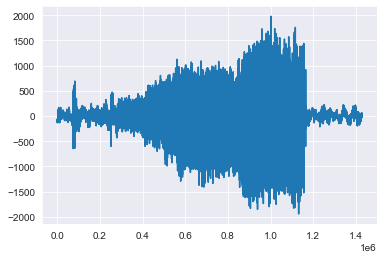

In [10]:
plt.plot(data)

In [11]:
import librosa.display, librosa

In [69]:
wav = 'C:/workspace/autoencoder/01_study/sound/baseline/2118111119H001003823_TDM_2021-08-27_17-08-46__Microphone.wav'

In [70]:
y, sr = librosa.load(wav)

In [22]:
print(sr)

22050


In [15]:
librosa.feature.melspectrogram(y=y, sr=sr)

array([[4.2116176e-02, 3.8851738e-02, 2.4181781e-02, ..., 2.8008474e-03,
        1.3366218e-03, 4.7186320e-03],
       [6.0503124e-03, 1.7881109e-03, 9.6342919e-05, ..., 6.3936715e-04,
        4.4784698e-04, 1.1484688e-03],
       [1.8793452e-03, 1.1637177e-03, 6.1768969e-04, ..., 5.8288488e-04,
        4.2309941e-04, 8.9794956e-04],
       ...,
       [1.7031886e-07, 2.5926585e-07, 2.1850880e-07, ..., 1.8998756e-07,
        3.1666298e-07, 3.6714584e-07],
       [1.0685819e-07, 1.5181094e-07, 1.7521579e-07, ..., 1.2597272e-07,
        1.7048377e-07, 1.2309839e-07],
       [1.2915997e-08, 1.1743723e-08, 1.1665031e-08, ..., 2.1588843e-08,
        2.5907967e-08, 3.0730007e-08]], dtype=float32)

In [62]:
# mel 필터뱅크 구성을 위한 사용자 지정 인수와 함께 mel-주파수 스펙트로그램 계수 표시(기본값: fmax=sr/2):
# Passing through arguments to the Mel filters
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                    fmax=8000)

C:\Users\astro\AppData\Local\Temp\ipykernel_8224\4004257251.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(img, ax=ax, format='%+2.0f dB')


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

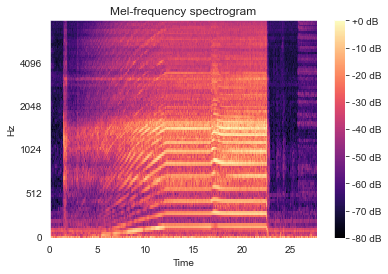

In [63]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [53]:
# 미리 계산된 power spectrogram을 사용하면 동일한 결과를 얻을 수 있습니다.
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D, sr=sr)

C:\Users\astro\AppData\Local\Temp\ipykernel_8224\4004257251.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(img, ax=ax, format='%+2.0f dB')


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

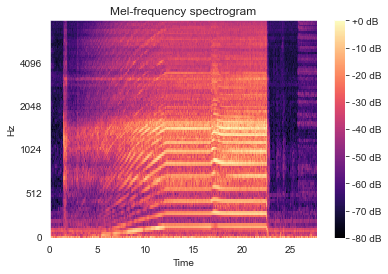

In [68]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [ ]:
# librosa.stft

In [96]:
y, sr = librosa.load(wav)
S = np.abs(librosa.stft(y))
S

array([[1.4388611e+00, 2.1307335e+00, 9.9624509e-01, ..., 5.3884959e-01,
        2.1450096e-01, 1.4404072e-01],
       [1.1828076e+00, 1.4472951e+00, 1.1338769e+00, ..., 2.6909807e-01,
        2.0077278e-01, 3.1284353e-01],
       [6.6513383e-01, 3.1229100e-01, 3.2124043e-01, ..., 1.9715233e-01,
        1.3502097e-01, 2.6643309e-01],
       ...,
       [1.6221833e-04, 7.9972975e-05, 1.1544256e-05, ..., 4.7442277e-06,
        1.4877735e-05, 3.6275500e-04],
       [1.5641160e-04, 7.7144774e-05, 5.8305031e-06, ..., 9.5197456e-06,
        8.5516431e-06, 3.6634415e-04],
       [1.5634282e-04, 7.9662503e-05, 2.1352305e-06, ..., 5.1091583e-06,
        1.7290971e-05, 3.7207815e-04]], dtype=float32)

In [97]:
# Use left-aligned frames, instead of centered frames
# 중앙 프레임 대신 왼쪽 정렬 프레임 사용
S_left = librosa.stft(y, center=False)

In [98]:
# Use a shorter hop length
# 더 짧은 홉 길이 사용
D_short = librosa.stft(y, hop_length=64)

C:\Users\astro\AppData\Local\Temp\ipykernel_8224\1151260170.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(img, ax=ax, format="%+2.0f dB")


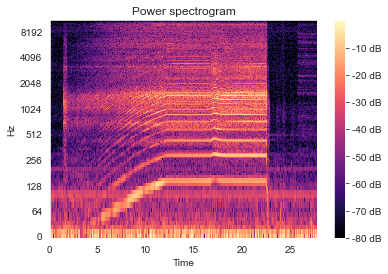

In [99]:
# Display a spectrogram
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [100]:
# librosa.power_to_db

In [101]:
# Get a power spectrogram from a waveform 
y, sr = librosa.load(wav)
S = np.abs(librosa.stft(y))
librosa.power_to_db(S**2)

array([[ 3.1603775e+00,  6.5705824e+00, -3.2676034e-02, ...,
        -5.3706493e+00, -1.3371415e+01, -1.6830294e+01],
       [ 1.4582820e+00,  3.2111416e+00,  1.0913182e+00, ...,
        -1.1401788e+01, -1.3945904e+01, -1.0093456e+01],
       [-3.5418191e+00, -1.0108810e+01, -9.8633966e+00, ...,
        -1.4103962e+01, -1.7391975e+01, -1.1488236e+01],
       ...,
       [-6.3199074e+01, -6.3199074e+01, -6.3199074e+01, ...,
        -6.3199074e+01, -6.3199074e+01, -6.3199074e+01],
       [-6.3199074e+01, -6.3199074e+01, -6.3199074e+01, ...,
        -6.3199074e+01, -6.3199074e+01, -6.3199074e+01],
       [-6.3199074e+01, -6.3199074e+01, -6.3199074e+01, ...,
        -6.3199074e+01, -6.3199074e+01, -6.3199074e+01]], dtype=float32)

In [102]:
# Compute dB relative to peak power
# peak power에 상대적인 dB 계산
librosa.power_to_db(S**2, ref=np.max)

array([[-13.640551, -10.230346, -16.833605, ..., -22.171577, -30.172344,
        -33.63122 ],
       [-15.342646, -13.589787, -15.70961 , ..., -28.202717, -30.746832,
        -26.894384],
       [-20.342747, -26.909739, -26.664326, ..., -30.90489 , -34.1929  ,
        -28.289165],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

In [ ]:
# Or compare to median power
# 또는 중앙값 검정력과 비교